# PDAP2019.2 / Lecture 08: Regression

03 Dec 2019

## Random numbers

In [1]:
import numpy as np

In [2]:
np.random.randn(1)

array([-1.48598231])

In [3]:
np.random.randn(5, 3)

array([[ 0.18131506,  1.08000945,  1.35478984],
       [ 1.01278936,  0.62847203,  0.20436817],
       [-1.27958029,  1.1352722 ,  0.32910084],
       [-0.30309383,  0.12367596, -0.88141806],
       [ 0.33189132,  0.9633722 ,  0.59294082]])

In [4]:
np.random.seed(123)
np.random.randn(1)

array([-1.0856306])

In [5]:
np.random.randn(1)

array([0.99734545])

In [6]:
np.random.seed(87415)
np.random.randn(1)

array([2.43296842])

## Generating synthetic measurements

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

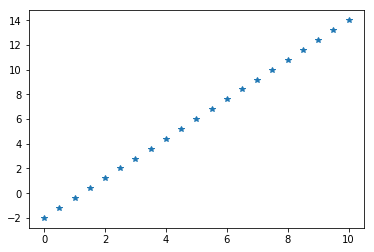

In [8]:
x = np.linspace(0., 10., 21)

slope_true, intercept_true = 1.6, -2.0
y_true = x * slope_true + intercept_true

plt.plot(x, y_true, '*')

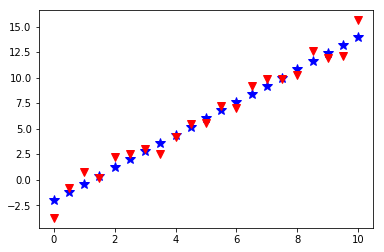

In [9]:
np.random.seed(100)
noise = np.random.randn(21)
y_noisy = y_true + noise

plt.plot(x, y_true, 'b*', ms=10)
plt.plot(x, y_noisy, 'rv', ms=8);

## Fit a straight line

### Method 1: `numpy.polyfit`

In [10]:
np.polyfit(x, y_noisy, 1)

array([ 1.62980347, -2.07542808])

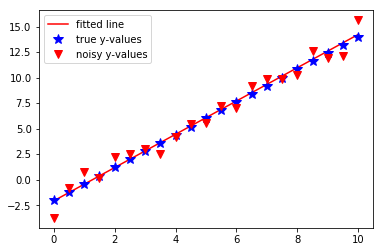

In [11]:
slope_fitted, intercept_fitted = np.polyfit(x, y_noisy, 1)
y_fitted = slope_fitted * x + intercept_fitted

plt.plot(x, y_fitted, 'r-', label='fitted line')
plt.plot(x, y_true, 'b*', ms=10, label='true y-values')
plt.plot(x, y_noisy, 'rv', ms=8, label='noisy y-values')
plt.legend(loc=0);

### Method 2: `scipy.stats.linregress`

In [12]:
from scipy.stats import linregress

In [13]:
linregress(x, y_noisy)

LinregressResult(slope=1.6298034690683472, intercept=-2.075428080433962, rvalue=0.9865037375758626, pvalue=2.143197746088076e-16, stderr=0.06205991161521321)

The result of the slope is $1.63 \pm 0.06$

### Method 3: `statsmodels`

In [14]:
import pandas as pd

from statsmodels.formula.api import ols

In [15]:
data = pd.DataFrame({'x': x, 'y': y_noisy})
data.head()

x         y
0  0.0 -3.749765
1  0.5 -0.857320
2  1.0  0.753036
3  1.5  0.147564
4  2.0  2.181321

In [16]:
lm = ols(formula='y ~ x', data=data)
result = lm.fit()
result.params

Intercept   -2.075428
x            1.629803
dtype: float64

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     689.7
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           2.14e-16
Time:                        10:46:33   Log-Likelihood:                -25.605
No. Observations:                  21   AIC:                             55.21
Df Residuals:                      19   BIC:                             57.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0754      0.363     -5.721      0.000      -2.835      -1.316
x              1.6298      0.062     26.262      0.000       1.500       1.760
==============================================================================
Omnibus:                        0.708   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.722
Skew:                          -0.229   Prob(JB):                        0.697
Kurtosis:                       2.215   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
result.fittedvalues

0     -2.075428
1     -1.260526
2     -0.445625
3      0.369277
4      1.184179
5      1.999081
6      2.813982
7      3.628884
8      4.443786
9      5.258688
10     6.073589
11     6.888491
12     7.703393
13     8.518294
14     9.333196
15    10.148098
16    10.963000
17    11.777901
18    12.592803
19    13.407705
20    14.222607
dtype: float64

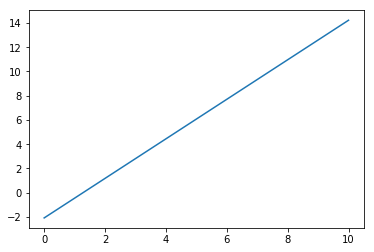

In [19]:
plt.plot(x, result.fittedvalues)

In [20]:
result.predict(pd.DataFrame({'x': np.linspace(0.5, 19.5, 20)}))

0     -1.260526
1      0.369277
2      1.999081
3      3.628884
4      5.258688
5      6.888491
6      8.518294
7     10.148098
8     11.777901
9     13.407705
10    15.037508
11    16.667312
12    18.297115
13    19.926919
14    21.556722
15    23.186526
16    24.816329
17    26.446133
18    28.075936
19    29.705740
dtype: float64

### Missing data points

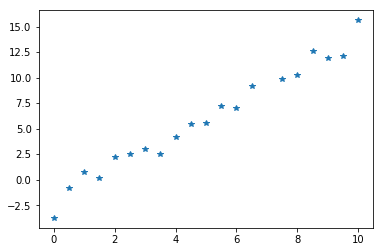

In [21]:
y_gap = y_noisy.copy()
y_gap[14] = np.nan

plt.plot(x, y_gap, '*');

In [22]:
linregress(x, y_gap)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [23]:
data_gap = pd.DataFrame({'x': x, 'y': y_gap})

In [24]:
ols(formula='y ~ x', data=data_gap).fit().params

Intercept   -2.072921
x            1.623786
dtype: float64

## Multiple inputs

Let's look at a function $f(x_1, x_2)$ which depends linearly on two variables $x_1$ and $x_2$:

$$ f(x_1, x_2) = 2 \cdot x_1 + 3 \cdot x_2 + 4 $$

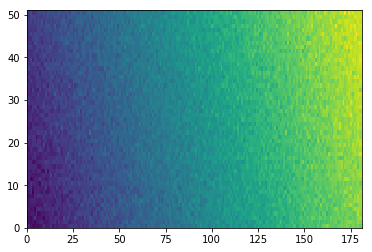

In [25]:
np.random.seed(321)
x1 = np.linspace(0., 20., 51)
x2 = np.linspace(10., 90., 181)
x1_2d = np.tile(x1, (x2.size, 1)).T
x2_2d = np.tile(x2, (x1.size, 1))

y_2d_true = 2. * x1_2d + 3. * x2_2d + 4.
y_2d_noisy = y_2d_true + np.random.normal(scale=10., size=y_2d_true.shape)
plt.pcolormesh(y_2d_noisy);

If we want to use `statsmodels` for fitting, we need to put the data into a `pandas.DataFrame`.  However, the columns of a `DataFrame` are only 1-D.  So we need to take proper the 2-D arrays for our `x1` and `x2` (which we called `x1_2d` and `x2_2d`), and then reshape these to 1-D:

In [26]:
data_2d = pd.DataFrame({'x1': x1_2d.ravel(), 'x2': x2_2d.ravel(), 'y': y_2d_noisy.ravel()})
data_2d.head()

x1         x2          y
0  0.0  10.000000  35.725195
1  0.0  10.444444  51.688159
2  0.0  10.888889  37.040031
3  0.0  11.333333  29.158503
4  0.0  11.777778  27.901411

In [27]:
ols(formula='y ~ x1 + x2', data=data_2d).fit().params

Intercept    3.553200
x1           1.992931
x2           3.009768
dtype: float64

This works pretty nicely.  Of course, now we used all the data points to fit the function.

What happens if we only have a limited number of measurements, say, 20?

Let's take 50 random values from our array:

In [28]:
np.random.seed(22)
choices = np.random.choice(range(data_2d.shape[0]), 20, replace=False)
choices

array([6147, 4358, 7758, 1470, 7085,  351, 5363, 3806, 3629, 5536, 3102,
       2334, 3131, 7584, 1379, 2394, 1025, 3855, 1100, 5757])

In [29]:
data_2d_limited = data_2d.iloc[choices]
ols(formula='y ~ x1 + x2', data=data_2d_limited).fit().params

Intercept   -2.801098
x1           2.204534
x2           3.107929
dtype: float64

## Curve fitting

### Linear regression using `curve_fit`

In [30]:
from scipy.optimize import curve_fit

In [31]:
def line(x, slope, intercept):
    return x * slope + intercept

In [32]:
curve_fit(line, x, y_noisy)

(array([ 1.62980347, -2.07542808]), array([[ 0.00385143, -0.01925716],
        [-0.01925716,  0.13159062]]))

In [33]:
def line2(x, intercept, slope):
    return x * slope + intercept

In [34]:
curve_fit(line2, x, y_noisy)

(array([-2.07542808,  1.62980347]), array([[ 0.13159062, -0.01925716],
        [-0.01925716,  0.00385143]]))

### Fitting a Gaussian

$$ f(x) = A \cdot \frac{1}{\sigma \cdot \sqrt{2 \pi}} \cdot \exp -\frac{(x - \mu)^2}{2 * \sigma ^2} $$

In [35]:
def gaussian(x, mu, sigma, a):
    return a / sigma / np.sqrt(2. * np.pi) * np.exp(-(x - mu)**2 / 2 / sigma**2)

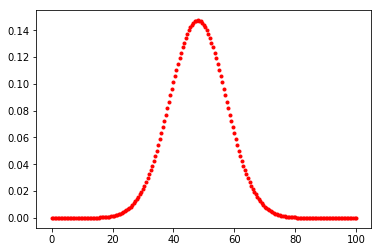

In [36]:
MU = 48.
SIGMA = 9.2
A = 3.4

X = np.linspace(0., 100., 201)
Y = gaussian(X, MU, SIGMA, A)

plt.plot(X, Y, 'r.');

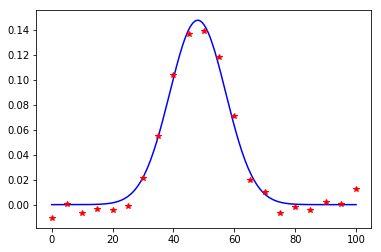

In [37]:
np.random.seed(2020)
X_SAMPLE = X[::10]
Y_SAMPLE = Y[::10] + np.random.normal(scale=0.006, size=X_SAMPLE.size)
plt.plot(X, Y, 'b-')
plt.plot(X_SAMPLE, Y_SAMPLE, 'r*');

/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


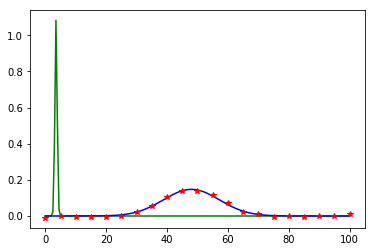

In [38]:
params = curve_fit(gaussian, X_SAMPLE, Y_SAMPLE)[0]
plt.plot(X, gaussian(X, *params), 'g')
plt.plot(X, Y, 'b')
plt.plot(X_SAMPLE, Y_SAMPLE, 'r*');

[ 1.55743141  0.64114873 -0.32595556]


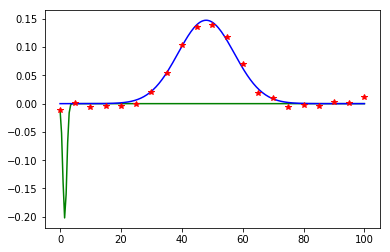

In [39]:
params = curve_fit(gaussian, X_SAMPLE, Y_SAMPLE, bounds=((-np.inf, 0., -np.inf), np.inf))[0]
print(params)
plt.plot(X, gaussian(X, *params), 'g')
plt.plot(X, Y, 'b')
plt.plot(X_SAMPLE, Y_SAMPLE, 'r*');

[48.21819743  9.24410262  3.41748293]


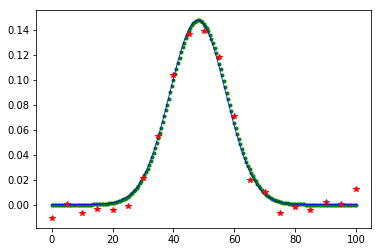

In [40]:
params = curve_fit(gaussian, X_SAMPLE, Y_SAMPLE, p0=[42., 1., 1.])[0]
print(params)
plt.plot(X, gaussian(X, *params), 'g.')
plt.plot(X, Y, 'b', lw=.8)
plt.plot(X_SAMPLE, Y_SAMPLE, 'r*');